In [1]:
import json
import os

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set()
rcParams['font.family'] = 'DejaVu Serif'

In [2]:
models_dir = "storage/models"
MODE = "embeddings"
ARTIST = "zun"
model_names = [f"LSTM-128_{ARTIST}", f"LSTM-NEW-128-128_{ARTIST}"]

losses = {}
for MODE in ['pitches', 'embeddings']:
    try:
        for mn in model_names:
            path = os.path.join(models_dir, MODE, mn, "loss.json")
            with open(path, "r") as handle:
                loss_per_epoch = json.load(handle)
            custom_name = mn\
                .replace('LSTM-NEW-128-128', 'Stacked LSTM (128-128)')\
                .replace('LSTM-128', 'Simple LSTM (128)')\
                .replace(ARTIST, '').replace('_', '')
            losses[custom_name + " - " + MODE] = loss_per_epoch
    except FileNotFoundError as ex:
        print(ex)
        pass
    
len(losses[list(losses.keys())[-1]]["train"]["all"])
losses.keys()

dict_keys(['Simple LSTM (128) - pitches', 'Stacked LSTM (128-128) - pitches', 'Simple LSTM (128) - embeddings', 'Stacked LSTM (128-128) - embeddings'])

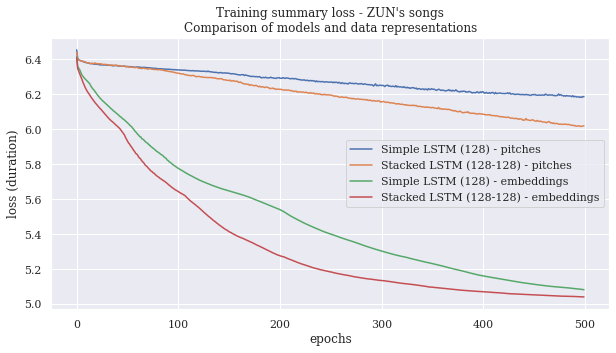

In [4]:

PLOT_EPOCHS_NUM = 500
plt.figure(figsize=(10, 5))

for mn in losses.keys():
    plt.plot(losses[mn]["train"]["all"][:PLOT_EPOCHS_NUM], label=mn)
    
plt.legend()

plt.title(f"Training summary loss - {ARTIST.upper()}'s songs\nComparison of models and data representations")
plt.xlabel("epochs")
plt.ylabel("loss (duration)")
    
# plt.savefig(os.path.join(model_dir, "training.png"))
plt.show()

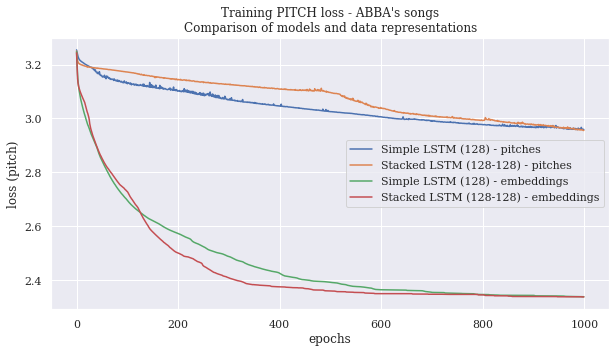

In [3]:
plt.figure(figsize=(10, 5))

for mn in losses.keys():
    plt.plot(losses[mn]["train"]["p"][:PLOT_EPOCHS_NUM], label=mn)
    
plt.legend()
plt.title(f"Training PITCH loss - {ARTIST.upper()}'s songs\nComparison of models and data representations")
plt.xlabel("epochs")
plt.ylabel("loss (pitch)")
plt.show()

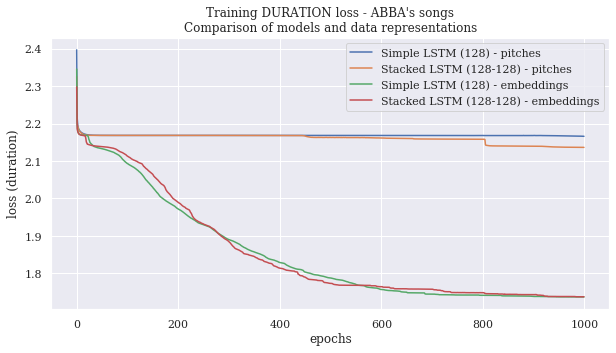

In [4]:
plt.figure(figsize=(10, 5))

for mn in losses.keys():
    plt.plot(losses[mn]["train"]["d"][:PLOT_EPOCHS_NUM], label=mn)
    
plt.legend()
plt.title(f"Training DURATION loss - {ARTIST.upper()}'s songs\nComparison of models and data representations")
plt.xlabel("epochs")
plt.ylabel("loss (duration)")
plt.show()

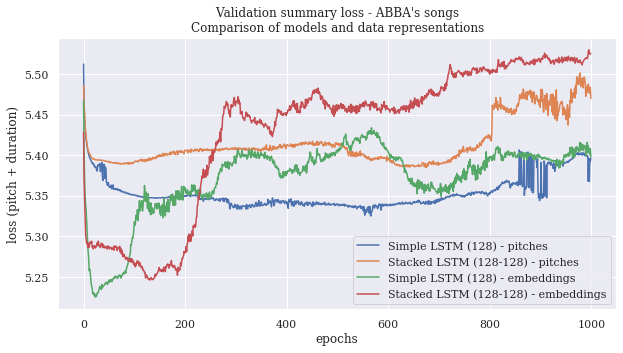

In [5]:
plt.figure(figsize=(10, 5))

for mn in losses.keys():
    plt.plot(losses[mn]["val"]["all"][:PLOT_EPOCHS_NUM], label=mn)
plt.legend()

plt.title(f"Validation summary loss - {ARTIST.upper()}'s songs\nComparison of models and data representations")
plt.xlabel("epochs")
plt.ylabel("loss (pitch + duration)")
    
plt.show()

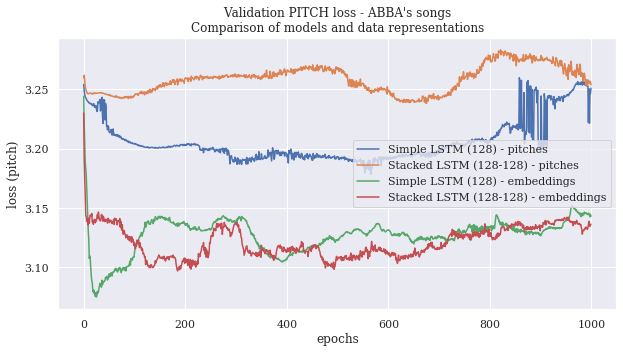

In [6]:
plt.figure(figsize=(10, 5))

for mn in losses.keys():
    plt.plot(losses[mn]["val"]["p"][:PLOT_EPOCHS_NUM], label=mn)
plt.legend()

plt.title(f"Validation PITCH loss - {ARTIST.upper()}'s songs\nComparison of models and data representations")
plt.xlabel("epochs")
plt.ylabel("loss (pitch)")
    
plt.show()

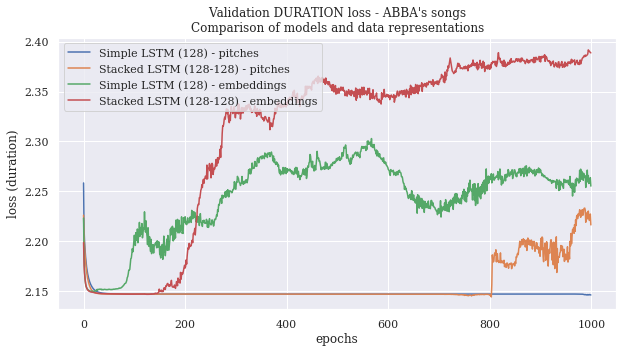

In [7]:
plt.figure(figsize=(10, 5))

for mn in losses.keys():
    plt.plot(losses[mn]["val"]["d"][:PLOT_EPOCHS_NUM], label=mn)
plt.legend()

plt.title(f"Validation DURATION loss - {ARTIST.upper()}'s songs\nComparison of models and data representations")
plt.xlabel("epochs")
plt.ylabel("loss (duration)")
    
plt.show()

In [6]:
import json
import os

models_dir = "storage/models"
MODE = "embeddings"
ARTIST = "*"
# model_name = f"LSTM-512_{ARTIST}" #, 
model_name = f"LSTM-NEW-512-512_{ARTIST}"
model_label = "Simple LSTM" if "NEW" not in model_name else "Stacked LSTM"

path = os.path.join(models_dir, MODE, model_name, "loss.json")

with open(path, "r") as handle:
    loss_per_epoch = json.load(handle)

# loss_per_epoch.keys()

In [4]:
loss_per_epoch['val']['all'] = [*loss_per_epoch['val']['all'], *loss_per_epoch['val']['all'][-3:]]
loss_per_epoch['val']['p'] = [*loss_per_epoch['val']['p'], *loss_per_epoch['val']['p'][-3:]]
loss_per_epoch['val']['d'] = [*loss_per_epoch['val']['d'], *loss_per_epoch['val']['d'][-3:]]

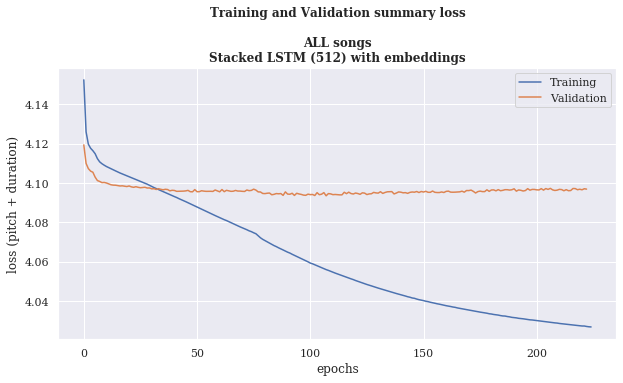

In [8]:
plt.figure(figsize=(10, 5))
SELECT = "train"

for SELECT in ["train", "val"]:
    for t in ["all"]: #, "p", "d"]:
        plt.plot(loss_per_epoch[SELECT][t], label="Training" if SELECT == "train" else "Validation")
    
plt.title(f"Training and Validation summary loss\n\nALL songs\nStacked LSTM (512) with embeddings", fontweight='bold')
plt.xlabel("epochs")
plt.ylabel("loss (pitch + duration)")
plt.legend()
    
plt.show()

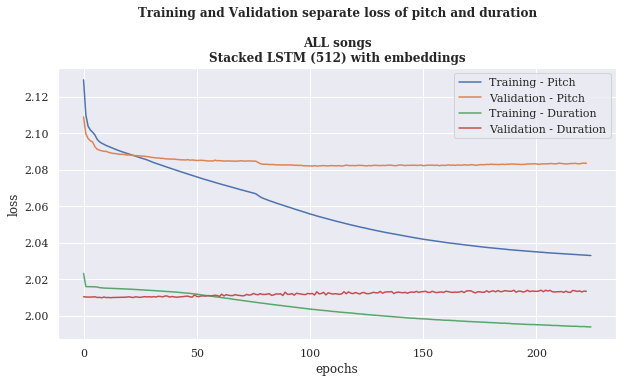

In [10]:
plt.figure(figsize=(10, 5))
SELECT = "train"

for t in ["p", "d"]:
    for SELECT in ["train", "val"]:
        plt.plot(loss_per_epoch[SELECT][t], label=("Training" if SELECT == "train" else "Validation") + " - " + ("Pitch" if t == "p" else "Duration"))
    
plt.title(f"Training and Validation separate loss of pitch and duration\n\nALL songs\nStacked LSTM (512) with embeddings", fontweight='bold')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()